<a href="https://colab.research.google.com/github/nereacurri1-cpu/goodreads-eda-nerea/blob/main/EDA_goodreads_Nerea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Introducción

Este proyecto consiste en un Análisis Exploratorio de Datos (EDA) del dataset
**Goodbooks-10k**, que contiene información sobre  10000 libros
(categorías, autores, calificaciones,  popularidad, entre otros.).

Objetivos:

- Evaluar la calidad del dataset (nulos, duplicados, tipos de datos).
- Comprender la distribución de las calificaciones promedio.
- Analizar la popularidad en términos de ratings y reviews.
- Estudiar la relación entre popularidad y valoración.
- Identificar los libros y autores más relevantes.
- Explorar tendencias temporales de publicación.




#2. Importación de librería

In [2]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

sns.set(style='whitegrid')
%matplotlib inline

print("Python:", sys.version)
print("pandas:", pd.__version__)
print("numpy:", np.__version__)
print("matplotlib:", matplotlib.__version__)
print("seaborn:", sns.__version__)


Python: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
pandas: 2.2.2
numpy: 2.0.2
matplotlib: 3.10.0
seaborn: 0.13.2



# 3. Carga del dataset

Cargamos el dataset desde una URL pública. Esto garantiza reproducibilidad del proyecto
y evita depender de archivos locales o de Kaggle.



In [3]:
url = "https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/books.csv"

df = pd.read_csv(url)
df.head()


,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


# 4. Inspección inicial

En esta sección revisamos:
- columnas,
- tipos de datos,
- valores faltantes,
- duplicados,
- estadísticas básicas.



### 4.1 Ver columnas

In [ ]:
df.columns


Index(['book_id', 'goodreads_book_id', 'best_book_id', 'work_id',
       'books_count', 'isbn', 'isbn13', 'authors', 'original_publication_year',
       'original_title', 'title', 'language_code', 'average_rating',
       'ratings_count', 'work_ratings_count', 'work_text_reviews_count',
       'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5',
       'image_url', 'small_image_url'],
      dtype='object')

### Explicación
Mostramos todos los nombres de columna para identificar:
- variables numéricas,
- variables categóricas,
- posibles columnas irrelevantes o derivadas,
- columnas que pueden tener nulos.


### 4.2 Info del dataframe

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   book_id                    10000 non-null  int64  
 1   goodreads_book_id          10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float64
 13  ratings_count              10000 non-null  int6

### Explicación
df.info() permite:
- ver el tipo de dato de cada columna,
- detectar columnas mal tipadas (por ejemplo, años como floats),
- contar cuántos valores no nulos hay por columna,
- evaluar si será necesario limpiar o transformar columnas.


### 4.3 Estadísticas descriptivas básicas

In [ ]:
df.describe()


,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn13,original_publication_year,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
count,10000.00000,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,9.415000e+03,9979.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04
mean,5000.50000,5.264697e+06,5.471214e+06,8.646183e+06,75.712700,9.755044e+12,1981.987674,4.002191,5.400124e+04,5.968732e+04,2919.955300,1345.040600,3110.885000,11475.893800,1.996570e+04,2.378981e+04
std,2886.89568,7.575462e+06,7.827330e+06,1.175106e+07,170.470728,4.428619e+11,152.576665,0.254427,1.573700e+05,1.678038e+05,6124.378132,6635.626263,9717.123578,28546.449183,5.144736e+04,7.976889e+04
min,1.00000,1.000000e+00,1.000000e+00,8.700000e+01,1.000000,1.951703e+08,-1750.000000,2.470000,2.716000e+03,5.510000e+03,3.000000,11.000000,30.000000,323.000000,7.500000e+02,7.540000e+02
25%,2500.75000,4.627575e+04,4.791175e+04,1.008841e+06,23.000000,9.780316e+12,1990.000000,3.850000,1.356875e+04,1.543875e+04,694.000000,196.000000,656.000000,3112.000000,5.405750e+03,5.334000e+03
50%,5000.50000,3.949655e+05,4.251235e+05,2.719524e+06,40.000000,9.780452e+12,2004.000000,4.020000,2.115550e+04,2.383250e+04,1402.000000,391.000000,1163.000000,4894.000000,8.269500e+03,8.836000e+03
75%,7500.25000,9.382225e+06,9.636112e+06,1.451775e+07,67.000000,9.780831e+12,2011.000000,4.180000,4.105350e+04,4.591500e+04,2744.250000,885.000000,2353.250000,9287.000000,1.602350e+04,1.730450e+04
max,10000.00000,3.328864e+07,3.553423e+07,5.639960e+07,3455.000000,9.790008e+12,2017.000000,4.820000,4.780653e+06,4.942365e+06,155254.000000,456191.000000,436802.000000,793319.000000,1.481305e+06,3.011543e+06


### Explicación
df.describe() genera estadísticas básicas útiles para:
- identificar rangos (mínimo, máximo),
- estimar si hay anomalías (años negativos, ratings imposibles),
- ver media,  dispersión y sesgo en variables numéricas.


# 5. Diagnóstico de calidad de datos

Antes de limpiar, identificamos valores faltantes y duplicados.


### 5.1 Cálculo de faltantes y duplicados

In [ ]:
missing = df.isna().sum()
dups = df.duplicated().sum()

print("Valores faltantes por columna:\n", missing)
print("\nFilas duplicadas:", dups)


Valores faltantes por columna:
 book_id                         0
goodreads_book_id               0
best_book_id                    0
work_id                         0
books_count                     0
isbn                          700
isbn13                        585
authors                         0
original_publication_year      21
original_title                585
title                           0
language_code                1084
average_rating                  0
ratings_count                   0
work_ratings_count              0
work_text_reviews_count         0
ratings_1                       0
ratings_2                       0
ratings_3                       0
ratings_4                       0
ratings_5                       0
image_url                       0
small_image_url                 0
dtype: int64

Filas duplicadas: 0


### Explicación
- `isna().sum()` muestra cuántos valores faltan por columna.
- `duplicated().sum()` revela si existen filas duplicadas.

Este paso permite decidir:
- si eliminamos filas,
- si imputamos valores,
- si dejamos columnas como están.


# 6. Limpieza del dataset

- Eliminamos duplicados si existen.
- Eliminamos filas con nulos en columnas clave cuando representan menos del 2% del total.


In [ ]:
print("=== Limpieza del dataset ===\n")

# Duplicados
n_dups = df.duplicated().sum()
print("Duplicados encontrados:", n_dups)

if n_dups > 0:
    df = df.drop_duplicates()
    print("Se eliminaron duplicados.\n")
else:
    print("No se eliminaron duplicados.\n")

# Nulos en columnas clave
cols_clave = ["title", "authors", "average_rating", "ratings_count"]
nulos_clave = df[cols_clave].isna().any(axis=1).sum()
porcentaje = nulos_clave / len(df)

print("Filas con nulos en columnas clave:", nulos_clave)

if nulos_clave > 0 and porcentaje < 0.02:
    df = df.dropna(subset=cols_clave)
    print("Se eliminaron filas con nulos en columnas clave.\n")
else:
    print("No se eliminaron filas con nulos.\n")

print("Shape final:", df.shape)


=== Limpieza del dataset ===

Duplicados encontrados: 0
No se eliminaron duplicados.

Filas con nulos en columnas clave: 0
No se eliminaron filas con nulos.

Shape final: (10000, 23)


### Explicación

1. **Eliminación de duplicados**
   - Si existen, se eliminan porque no aportan información nueva.
   - En este dataset, no había duplicados.

2. **Manejo de valores faltantes**
   - Se revisan las columnas clave:
     - `title`, `authors`, `average_rating`, `ratings_count`
   - Si representan menos del 2% del dataset, se eliminan esas filas.
   - Esto evita sesgos sin pérdida significativa de datos.

3. **Resultado final**
   - El dataset queda limpio y consistente para análisis posteriores.


# 7. Análisis Univariado

Analizamos las distribuciones de:
- `average_rating`
- `ratings_count`
- `work_text_reviews_count`


In [4]:
numericas = ["average_rating", "ratings_count", "work_text_reviews_count"]
df[numericas].describe()


,average_rating,ratings_count,work_text_reviews_count
count,10000.000000,1.000000e+04,10000.000000
mean,4.002191,5.400124e+04,2919.955300
std,0.254427,1.573700e+05,6124.378132
min,2.470000,2.716000e+03,3.000000
25%,3.850000,1.356875e+04,694.000000
50%,4.020000,2.115550e+04,1402.000000
75%,4.180000,4.105350e+04,2744.250000
max,4.820000,4.780653e+06,155254.000000


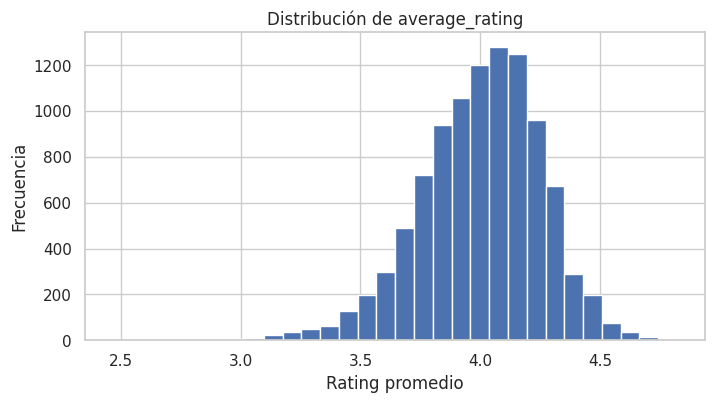

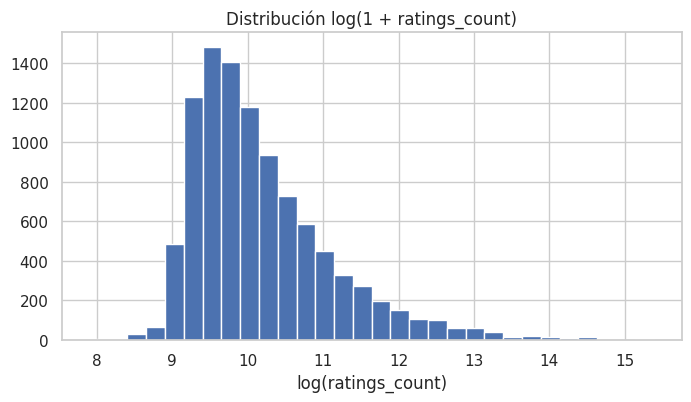

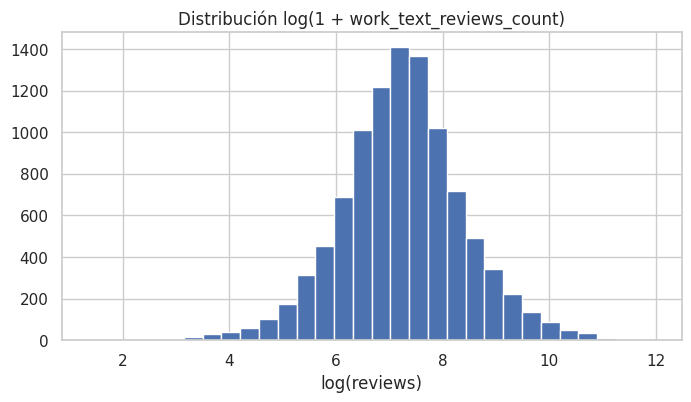

In [5]:
# average_rating
plt.figure(figsize=(8,4))
df["average_rating"].hist(bins=30)
plt.title("Distribución de average_rating")
plt.xlabel("Rating promedio")
plt.ylabel("Frecuencia")
plt.show()

# ratings_count (log)
plt.figure(figsize=(8,4))
plt.hist(np.log1p(df["ratings_count"]), bins=30)
plt.title("Distribución log(1 + ratings_count)")
plt.xlabel("log(ratings_count)")
plt.show()

# work_text_reviews_count (log)
plt.figure(figsize=(8,4))
plt.hist(np.log1p(df["work_text_reviews_count"]), bins=30)
plt.title("Distribución log(1 + work_text_reviews_count)")
plt.xlabel("log(reviews)")
plt.show()


In [13]:
import numpy as np

# cuantiles originales
print("Ratings_count - cuantiles (original):")
print(df['ratings_count'].quantile([0.25,0.5,0.75,1.0]))
print("\nWork_text_reviews_count - cuantiles (original):")
print(df['work_text_reviews_count'].quantile([0.25,0.5,0.75,1.0]))

# cuantiles en escala log(1+x)
print("\nRatings_count - cuantiles (log1p):")
print(np.log1p(df['ratings_count']).quantile([0.25,0.5,0.75,1.0]))
print("\nWork_text_reviews_count - cuantiles (log1p):")
print(np.log1p(df['work_text_reviews_count']).quantile([0.25,0.5,0.75,1.0]))


Ratings_count - cuantiles (original):
0.25      13568.75
0.50      21155.50
0.75      41053.50
1.00    4780653.00
Name: ratings_count, dtype: float64

Work_text_reviews_count - cuantiles (original):
0.25       694.00
0.50      1402.00
0.75      2744.25
1.00    155254.00
Name: work_text_reviews_count, dtype: float64

Ratings_count - cuantiles (log1p):
0.25     9.515598
0.50     9.959702
0.75    10.622656
1.00    15.380088
Name: ratings_count, dtype: float64

Work_text_reviews_count - cuantiles (log1p):
0.25     6.543912
0.50     7.246368
0.75     7.917627
1.00    11.952824
Name: work_text_reviews_count, dtype: float64


## Interpretación de las variables de popularidad

En esta sección analizamos las variables **ratings_count** (cantidad total de calificaciones) y **work_text_reviews_count** (cantidad total de reseñas textuales). Ambas presentan una distribución altamente asimétrica, por lo que se utilizaron histogramas tanto en escala original como en escala logarítmica (`log(1 + x)`).

---

## 1. Interpretación de ratings_count

Los estadísticos descriptivos muestran:

- **Media:** 54.001  
- **Mediana:** 21.155  
- **Rango intercuartílico:** 13.568 – 41.053  
- **Máximo:** más de 4.7 millones  
- **Desviación estándar:** 157.370 (muy grande)

Esto indica una **asimetría extrema**: la mayoría de los libros recibe entre 10.000 y 40.000 ratings, mientras que unos pocos títulos concentran cientos de miles o incluso millones de calificaciones.

### Correspondencia con el histograma logarítmico

Aplicando `log(1 + ratings_count)` obtenemos:

- Q1: log ≈ **9.52**
- Q2 (mediana): log ≈ **9.96**
- Q3: log ≈ **10.62**
- Máximo: log ≈ **15.38**

En el histograma logarítmico se observa un pico claro entre **9.5 y 10.6**, exactamente donde se ubica el 50% de los libros.  
La cola extendida hacia valores entre **14 y 15** representa a los libros excepcionalmente populares.

**Conclusión:**  
La transformación logarítmica revela la estructura real de la variable y evita que los outliers dominen la visualización.

---

## 2. Interpretación de work_text_reviews_count

Según la estadística descriptiva:

- **Media:** 2.919  
- **Mediana:** 1.402  
- **Rango intercuartílico:** 694 – 2.744  
- **Máximo:** 155.254  
- **Desviación estándar:** 6.124

Hay también una **asimetría marcada**: la mayoría de los libros tiene pocas reseñas, mientras que unos pocos acumulan decenas de miles.

### Correspondencia con el histograma logarítmico

Transformando a escala log:

- Q1: log ≈ **6.54**
- Q2 (mediana): log ≈ **7.25**
- Q3: log ≈ **7.92**
- Máximo: log ≈ **11.95**

En el histograma transformado, el pico principal aparece entre **6.5 y 8**, coincidiendo exactamente con los valores típicos de la mayoría de los libros.  
La cola extendida hacia valores cercanos a **12** representa a los libros con decenas de miles de reseñas.

**Conclusión:**  
Al igual que en ratings_count, la transformación logarítmica permite visualizar la masa central de los datos y detectar los outliers de forma clara y equilibrada.

---

## 3. Conclusión general de esta sección

Ambas variables —*ratings_count* y *work_text_reviews_count*— presentan distribuciones altamente asimétricas con colas derechas muy largas. Este patrón es típico en datos de popularidad, donde pocos elementos concentran la mayor parte de la atención de los usuarios.

La transformación logarítmica:
- revela la estructura interna de los datos,
- mejora la interpretabilidad,
- evita que los valores extremos oculten el comportamiento general.

Los gráficos y los valores estadísticos son plenamente coherentes entre sí, confirmando que el análisis reflejaba correctamente la naturaleza del dataset.


# 8. Libros y autores destacados


## 8.1 Top libros por rating

In [6]:
df.sort_values(["average_rating", "ratings_count"], ascending=[False, False])[
    ["title", "authors", "average_rating", "ratings_count"]
].head(10)


,title,authors,average_rating,ratings_count
3627,The Complete Calvin and Hobbes,Bill Watterson,4.82,28900
861,"Words of Radiance (The Stormlight Archive, #2)",Brandon Sanderson,4.77,73572
3274,"Harry Potter Boxed Set, Books 1-5 (Harry Potte...","J.K. Rowling, Mary GrandPré",4.77,33220
8853,Mark of the Lion Trilogy,Francine Rivers,4.76,9081
7946,ESV Study Bible,"Anonymous, Lane T. Dennis, Wayne A. Grudem",4.76,8953
4482,It's a Magical World: A Calvin and Hobbes Coll...,Bill Watterson,4.75,22351
421,"Harry Potter Boxset (Harry Potter, #1-7)",J.K. Rowling,4.74,190050
6360,There's Treasure Everywhere: A Calvin and Hobb...,Bill Watterson,4.74,16766
3752,"Harry Potter Collection (Harry Potter, #1-6)",J.K. Rowling,4.73,24618
6589,The Authoritative Calvin and Hobbes: A Calvin ...,Bill Watterson,4.73,16087


## 8.2 Top libros por cantidad de ratings

In [7]:
df.sort_values("ratings_count", ascending=False)[
    ["title", "authors", "average_rating", "ratings_count"]
].head(10)


,title,authors,average_rating,ratings_count
0,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,4.34,4780653
1,Harry Potter and the Sorcerer's Stone (Harry P...,"J.K. Rowling, Mary GrandPré",4.44,4602479
2,"Twilight (Twilight, #1)",Stephenie Meyer,3.57,3866839
3,To Kill a Mockingbird,Harper Lee,4.25,3198671
4,The Great Gatsby,F. Scott Fitzgerald,3.89,2683664
5,The Fault in Our Stars,John Green,4.26,2346404
6,The Hobbit,J.R.R. Tolkien,4.25,2071616
7,The Catcher in the Rye,J.D. Salinger,3.79,2044241
9,Pride and Prejudice,Jane Austen,4.24,2035490
8,"Angels & Demons (Robert Langdon, #1)",Dan Brown,3.85,2001311


## 8.3 Autores más prolíficos

In [8]:
df["authors"].value_counts().head(10)


,count
authors,
Stephen King,60
Nora Roberts,59
Dean Koontz,47
Terry Pratchett,42
Agatha Christie,39
Meg Cabot,37
James Patterson,36
David Baldacci,34
John Grisham,33


### Interpretación

- Los libros mejor valorados no siempre son los más populares.
- Los más populares suelen ser sagas juveniles y best sellers.
- Los autores con más libros no necesariamente tienen mejores calificaciones.


# 9. Análisis Bivariado

Exploramos relaciones entre variables cuantitativas.


## 9.1 average_rating vs ratings_count

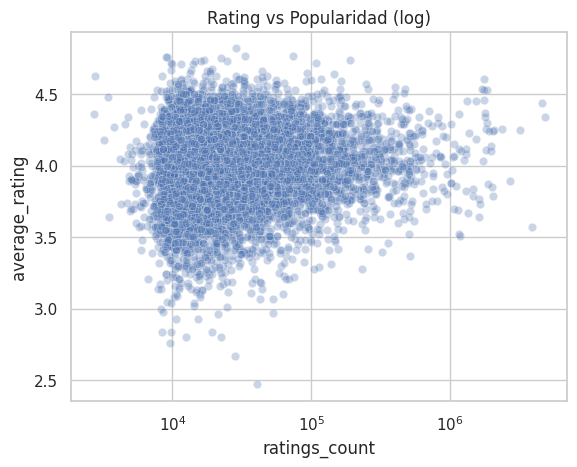

In [9]:
sns.scatterplot(data=df, x="ratings_count", y="average_rating", alpha=0.3)
plt.xscale("log")
plt.title("Rating vs Popularidad (log)")
plt.show()


### Interpretación

- No existe relación clara entre valoración y popularidad.
- Un libro puede ser excelente pero tener pocas calificaciones.
- Los puntos están horizontalmente distribuidos.


## 9.2 Matrices de correlación

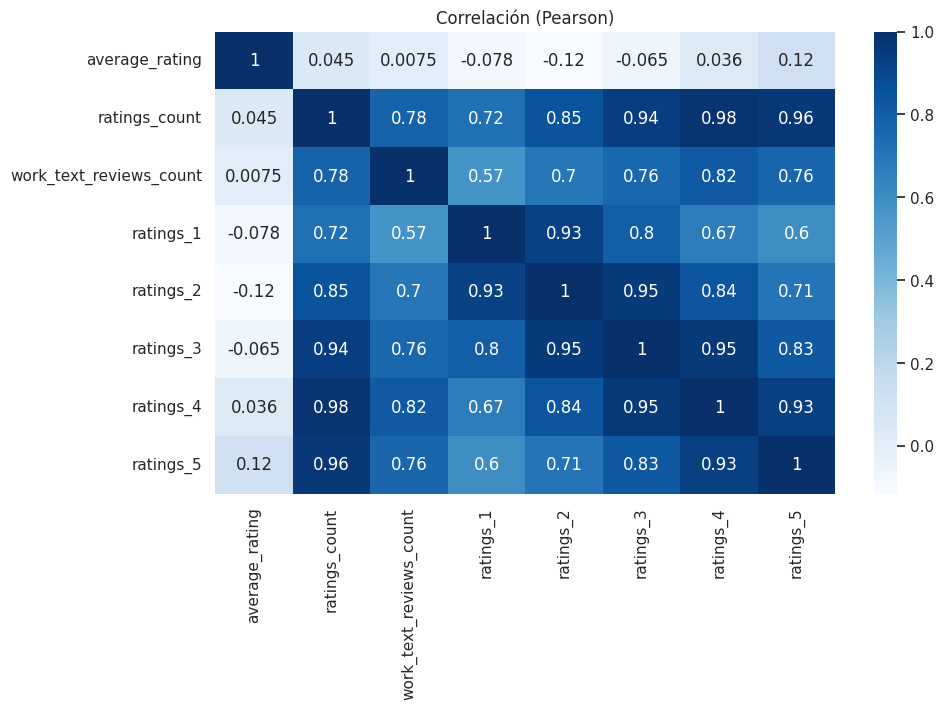

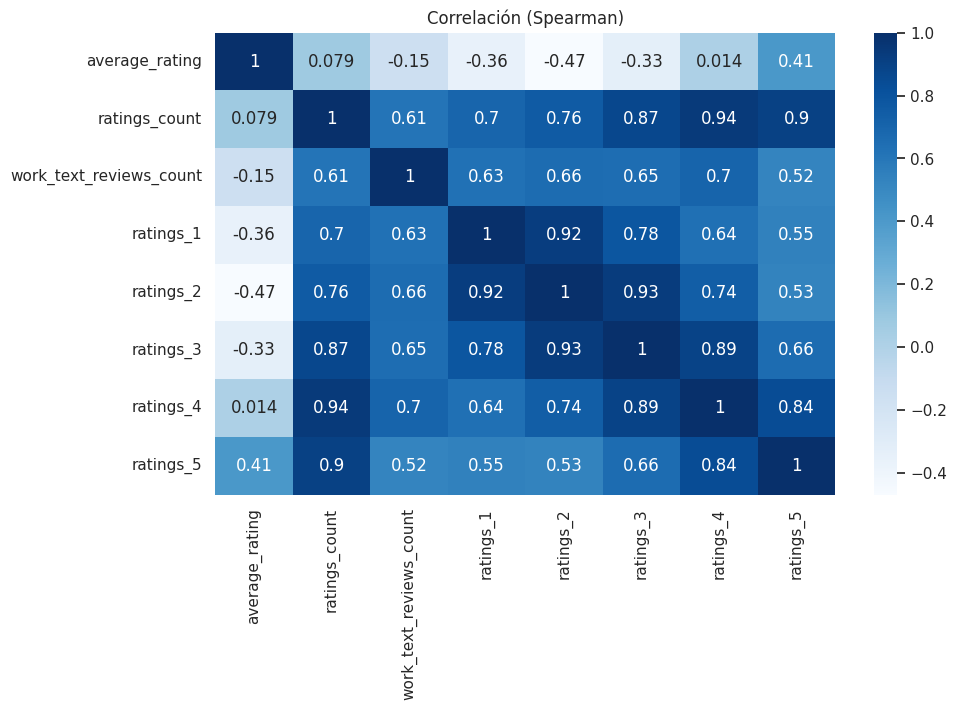

In [10]:
num_cols = ["average_rating", "ratings_count", "work_text_reviews_count",
            "ratings_1","ratings_2","ratings_3","ratings_4","ratings_5"]

pearson = df[num_cols].corr(method="pearson")
spearman = df[num_cols].corr(method="spearman")

plt.figure(figsize=(10,6))
sns.heatmap(pearson, annot=True, cmap="Blues")
plt.title("Correlación (Pearson)")
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(spearman, annot=True, cmap="Blues")
plt.title("Correlación (Spearman)")
plt.show()


### Interpretación

- `average_rating` tiene correlaciones cercanas a 0 con popularidad.
- Las columnas `ratings_1` a `ratings_5` están muy correlacionadas entre sí.
- `ratings_count` y `work_text_reviews_count` tienen correlación alta (esperado).


# 10. Tendencia de publicaciones por año (1800–2023)


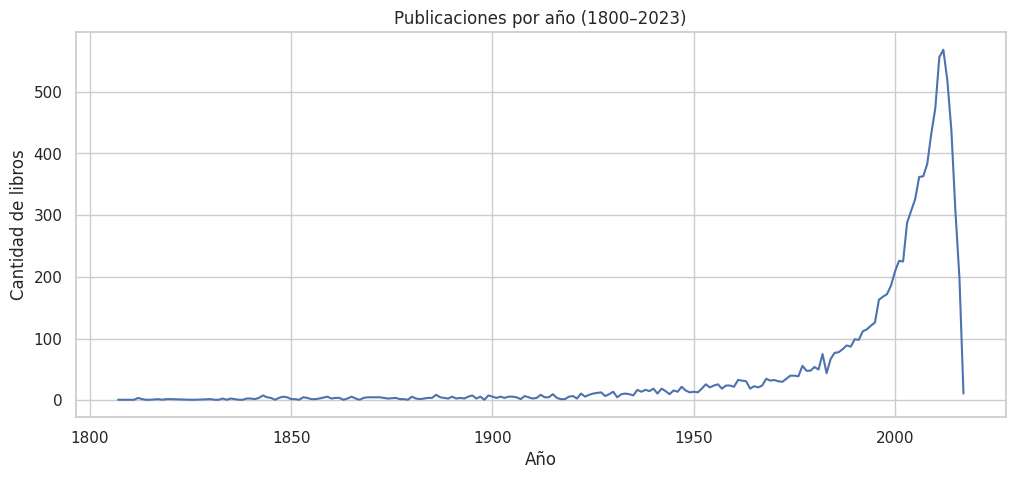

In [11]:
df_years = df[df["original_publication_year"].notna()].copy()

df_recent = df_years[
    (df_years["original_publication_year"] >= 1800) &
    (df_years["original_publication_year"] <= 2023)
].copy()

df_recent["original_publication_year"] = df_recent["original_publication_year"].astype(int)

pub_by_year = df_recent["original_publication_year"].value_counts().sort_index()

plt.figure(figsize=(12,5))
plt.plot(pub_by_year.index, pub_by_year.values)
plt.title("Publicaciones por año (1800–2023)")
plt.xlabel("Año")
plt.ylabel("Cantidad de libros")
plt.show()


### Interpretación

- Entre 1800 y 1950 aparecen pocos libros (sesgo del dataset).
- Desde 1990 hay un aumento significativo.
- Pico entre 2000–2010 → literatura moderna domina el dataset.
- Después de 2015 hay una caída natural porque libros recientes tienen menos visibilidad.


# 11. Conclusiones

- El dataset contiene principalmente libros modernos.
- Las calificaciones son consistentemente altas.
- Popularidad y valoración no están correlacionadas.
- Pocos libros concentran la mayor parte de la atención.
